# Exploratory Data Analysis of Netflix Content

This notebook aims to perform an exploratory analysis of the Netflix dataset to uncover trends, distributions, and insights regarding the content available on the platform. The dataset contains information about movies and TV shows, including details such as release year, genre, duration, country, and ratings.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('/Users/idil/Desktop/data/hackathon.zip')

In [65]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic Data Info

In [66]:
df.shape

(8807, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [68]:
# Finding the number of nulls in the data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In my analysis of the Netflix dataset,I'll concentrate on various fundamental elements to extract valuable insights from the available content. However, I won't be delving into the analysis of 'cast' or 'director' due to a substantial number of missing data points. Approximately 825 entries lack cast information, while 2634 entries are missing director details.

Moreover, while examining the 'country' attribute, I noticed around 831 data points with no country information available. For a more comprehensive analysis concerning countries, I plan to source additional data to augment and enrich this particular aspect of the dataset.

# Add more data points

In [70]:
#source:https://www.kaggle.com/datasets/senapatirajesh/netflix-tv-shows-and-movies/data
#Latest Netflix TV shows and movies
df2 = pd.read_csv('/Users/idil/Desktop/data/NetFlix.csv')

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


By integrating additional data from an alternate table, the original DataFrame gains an expanded pool of information regarding countries. This process involves consolidating or appending external data, expanding the dataset to provide a more thorough depiction of the countries associated with the entries in the original DataFrame."


In [72]:
# Merging 'country' column from df2 into df based on 'show_id'
merged_df = pd.merge(df, df2[['show_id', 'country']], on='show_id', how='inner')

merged_df

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Brazil
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Mexico
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Singapore
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,TV Show,Power Rangers Time Force,NaN,"Jason Faunt, Erin Cahill, Kevin Kleinberg, Deb...",United States,"January 1, 2016",2001,TV-Y7,1 Season,Kids' TV,The team launches a new campaign against evil ...,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,s7784,TV Show,Power Rangers Turbo,NaN,"Johnny Yong Bosch, Nakia Burrise, Blake Foster...","United States, France, Japan","January 1, 2016",1997,TV-Y7,1 Season,Kids' TV,The Rangers use high-tech battle cars to take ...,India
7784,s7785,TV Show,Power Rangers Wild Force,NaN,"Ricardo Medina Jr., Alyson Kiperman, Phillip J...","United States, Netherlands, Japan, France","January 1, 2016",2002,TV-Y7,1 Season,Kids' TV,"Raised in the wilderness, young Cole Evans lea...",NaN
7785,s7786,TV Show,Power Rangers Zeo,NaN,"Catherine Sutherland, Nakia Burrise, Steve Car...","United States, France, Japan","January 1, 2016",1996,TV-Y7,1 Season,Kids' TV,"This ""Mighty Morphin Power Rangers"" spinoff fi...",Australia


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5334 non-null   object
 4   cast          7068 non-null   object
 5   country_x     6996 non-null   object
 6   date_added    7779 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7783 non-null   object
 9   duration      7784 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  country_y     7280 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [74]:
# Finding the number of nulls in the data
merged_df.isnull().sum()

show_id            0
type               0
title              0
director        2453
cast             719
country_x        791
date_added         8
release_year       0
rating             4
duration           3
listed_in          0
description        0
country_y        507
dtype: int64

In [75]:
df_added_country = merged_df.copy()

In [76]:

# Fill missing values in 'country_x' with values from 'country_y'
df_added_country['country_x'].fillna(df_added_country['country_y'], inplace=True)

# Drop 'country_y' column
df_added_country.drop('country_y', axis=1, inplace=True)

# Rename 'country_x' to 'country'
df_added_country.rename(columns={'country_x': 'country'}, inplace=True)

df_added_country


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Singapore,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,TV Show,Power Rangers Time Force,NaN,"Jason Faunt, Erin Cahill, Kevin Kleinberg, Deb...",United States,"January 1, 2016",2001,TV-Y7,1 Season,Kids' TV,The team launches a new campaign against evil ...
7783,s7784,TV Show,Power Rangers Turbo,NaN,"Johnny Yong Bosch, Nakia Burrise, Blake Foster...","United States, France, Japan","January 1, 2016",1997,TV-Y7,1 Season,Kids' TV,The Rangers use high-tech battle cars to take ...
7784,s7785,TV Show,Power Rangers Wild Force,NaN,"Ricardo Medina Jr., Alyson Kiperman, Phillip J...","United States, Netherlands, Japan, France","January 1, 2016",2002,TV-Y7,1 Season,Kids' TV,"Raised in the wilderness, young Cole Evans lea..."
7785,s7786,TV Show,Power Rangers Zeo,NaN,"Catherine Sutherland, Nakia Burrise, Steve Car...","United States, France, Japan","January 1, 2016",1996,TV-Y7,1 Season,Kids' TV,"This ""Mighty Morphin Power Rangers"" spinoff fi..."


In [77]:
df_added_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5334 non-null   object
 4   cast          7068 non-null   object
 5   country       7735 non-null   object
 6   date_added    7779 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7783 non-null   object
 9   duration      7784 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [78]:
# Finding the number of nulls in the data
df_added_country.isnull().sum()

show_id            0
type               0
title              0
director        2453
cast             719
country           52
date_added         8
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [79]:
netflix_df= df_added_country.copy()

In [81]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,TV Show,Power Rangers Time Force,NaN,"Jason Faunt, Erin Cahill, Kevin Kleinberg, Deb...",United States,"January 1, 2016",2001,TV-Y7,1 Season,Kids' TV,The team launches a new campaign against evil ...
7783,s7784,TV Show,Power Rangers Turbo,NaN,"Johnny Yong Bosch, Nakia Burrise, Blake Foster...","United States, France, Japan","January 1, 2016",1997,TV-Y7,1 Season,Kids' TV,The Rangers use high-tech battle cars to take ...
7784,s7785,TV Show,Power Rangers Wild Force,NaN,"Ricardo Medina Jr., Alyson Kiperman, Phillip J...","United States, Netherlands, Japan, France","January 1, 2016",2002,TV-Y7,1 Season,Kids' TV,"Raised in the wilderness, young Cole Evans lea..."
7785,s7786,TV Show,Power Rangers Zeo,NaN,"Catherine Sutherland, Nakia Burrise, Steve Car...","United States, France, Japan","January 1, 2016",1996,TV-Y7,1 Season,Kids' TV,"This ""Mighty Morphin Power Rangers"" spinoff fi..."
7786,s7787,TV Show,Power Rangers: Megaforce,NaN,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,1 Season,Kids' TV,When Earth is threatened by a massive alien in...


# Data Analysis

In [82]:
netflix_df["type"].value_counts()

type
Movie      5296
TV Show    2491
Name: count, dtype: int64

In [83]:
#Top countries producing content on Netflix
top_10_countries = netflix_df['country'].value_counts().head(10)
top_10_countries_df = top_10_countries.reset_index(name = 'total')
top_10_countries_df

,country,total
0,United States,2700
1,India,959
2,United Kingdom,390
3,Japan,263
4,South Korea,201
5,Canada,171
6,Spain,153
7,France,123
8,Turkey,109
9,Mexico,105


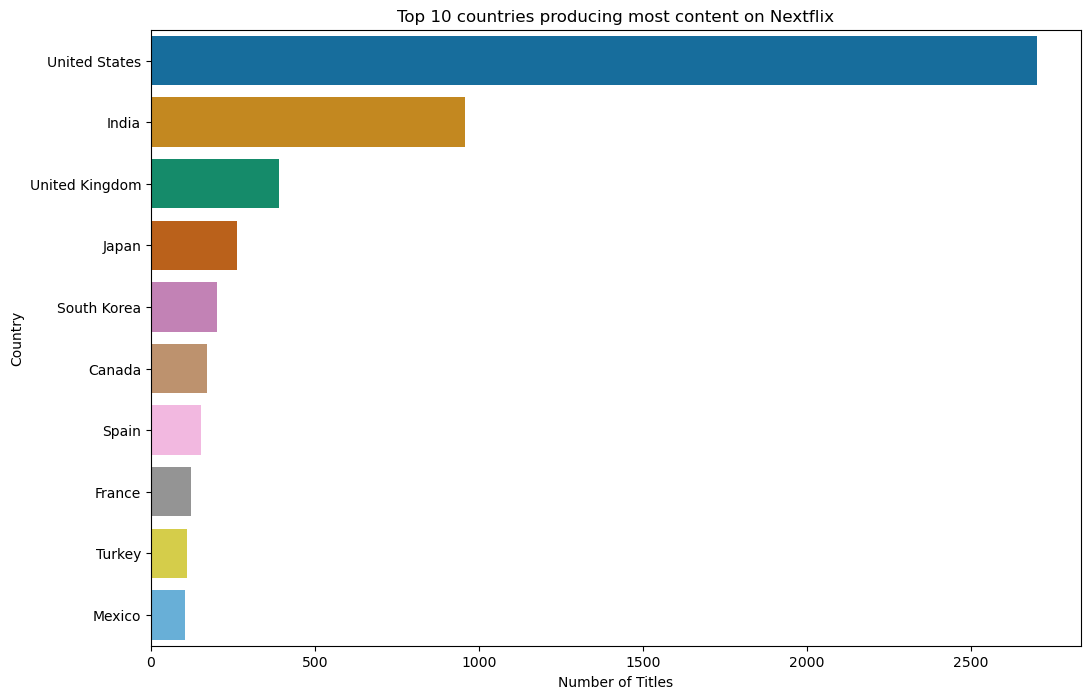

In [84]:
plt.figure(figsize = (12,8))
sns.barplot (x = "total", y = "country", data = top_10_countries_df, palette = 'colorblind' )
plt.title ('Top 10 countries producing most content on Nextflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
# Tv shows are mostly produced by which country

In [85]:
tv= netflix_df[netflix_df["type"]=="TV Show"]
print(tv.groupby("type")["country"].value_counts().head(10))

type     country       
TV Show  United States     837
         United Kingdom    207
         Japan             176
         South Korea       159
         India             107
         Taiwan             68
         Canada             58
         Spain              54
         France             50
         Australia          50
Name: count, dtype: int64


In [86]:
movie= netflix_df[netflix_df["type"]=="Movie"]
print(movie.groupby("type")["country"].value_counts().head(10))

type   country       
Movie  United States     1863
       India              852
       United Kingdom     183
       Canada             113
       Spain               99
       Japan               87
       Nigeria             84
       Turkey              80
       Egypt               79
       Philippines         75
Name: count, dtype: int64


In [112]:
#In which month mostly movies or Tv shows are Aired 

In [94]:
# Convert 'date_added' to datetime format if it's not already in datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format=" %B %d, %Y", errors='coerce')

# Extract month from 'date_added'
netflix_df['month'] = netflix_df['date_added'].dt.month_name()

# Count occurrences of content added in each month
month_counts = netflix_df['month'].value_counts()

# Sort the months chronologically
#Create a list of months in chronological order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
 #Sort the months based on the predefined order
    
month_counts = month_counts.reindex(months_order)


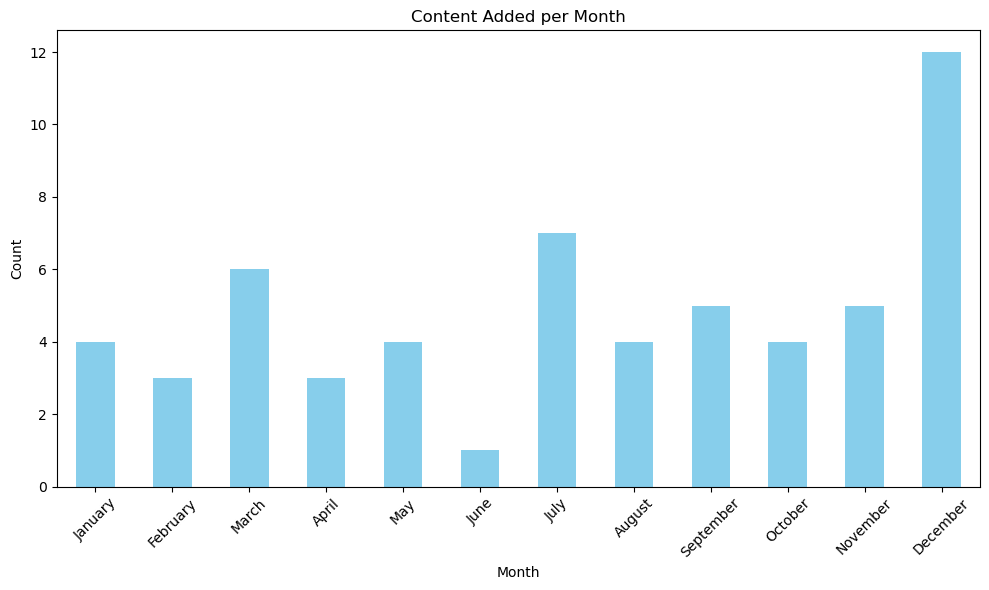

In [95]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.title('Content Added per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#Popular genres on Netflix
genres = netflix_df['listed_in'].explode().value_counts().head(10)
genres 

listed_in
Stand-Up Comedy                                     333
Dramas, International Movies                        307
Documentaries                                       302
Comedies, Dramas, International Movies              253
Dramas, Independent Movies, International Movies    221
Kids' TV                                            205
Children & Family Movies                            187
Children & Family Movies, Comedies                  176
Dramas, International Movies, Romantic Movies       165
Comedies, International Movies                      164
Name: count, dtype: int64

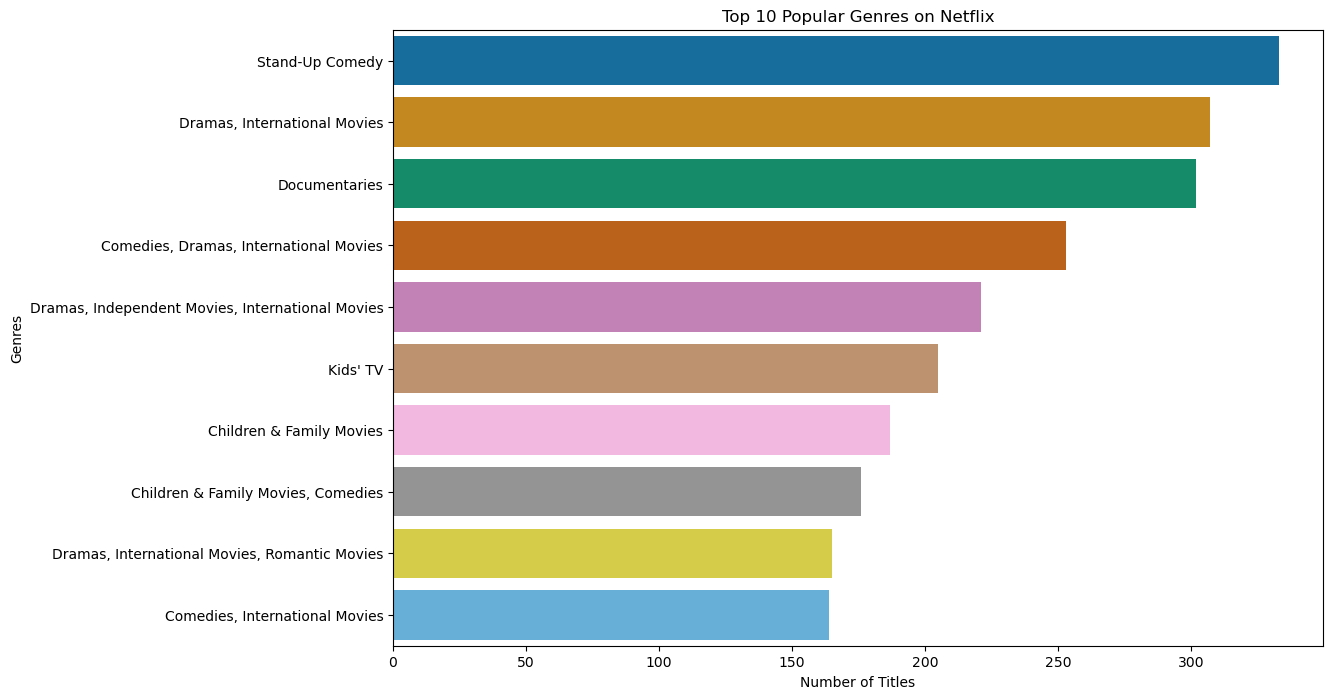

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres.values, y=genres.index, palette = 'colorblind')
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()

In [45]:
netflix_df["rating"].describe()

count      7783
unique       17
top       TV-MA
freq       2960
Name: rating, dtype: object

In [106]:
# Mostly movies and Tv shows has mostly what type of rating


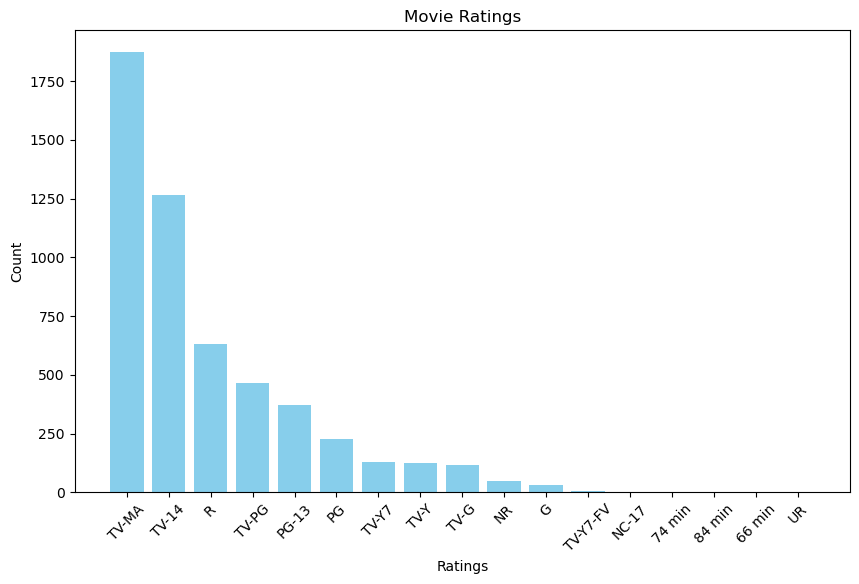

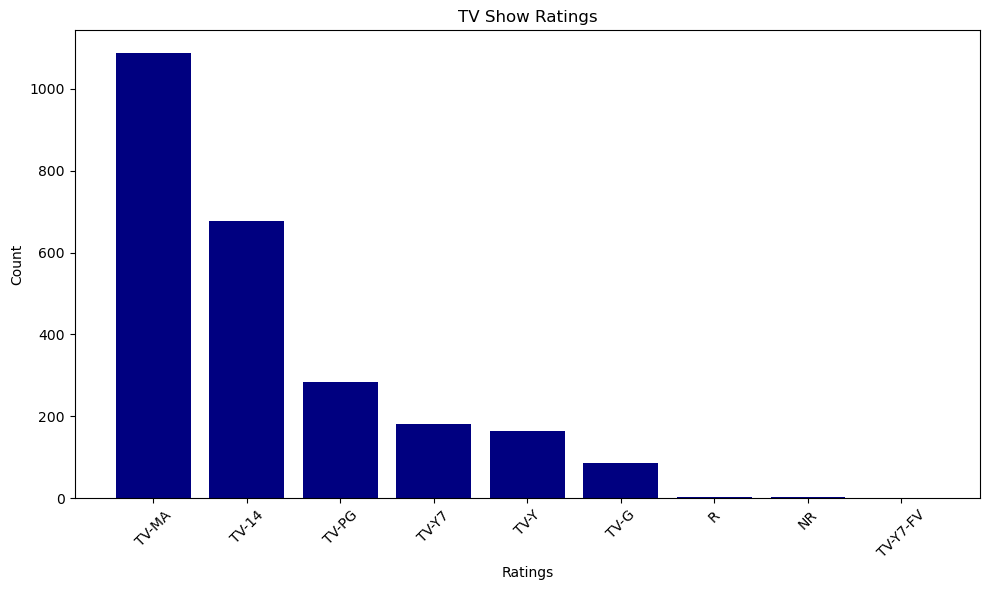

In [110]:
movie_ratings_count = movie["rating"].value_counts()


# Creating a bar plot for movie ratings
plt.figure(figsize=(10, 6))
plt.bar(movie_ratings_count.index, movie_ratings_count.values, color='skyblue')
plt.title('Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

tv_ratings_count = tv["rating"].value_counts()

# Creating a bar plot for TV show ratings

plt.figure(figsize=(10, 6))
plt.bar(tv_ratings_count.index, tv_ratings_count.values, color='navy')
plt.title('TV Show Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


a time series plot showing how the average duration of content added to Netflix has changed over the years.

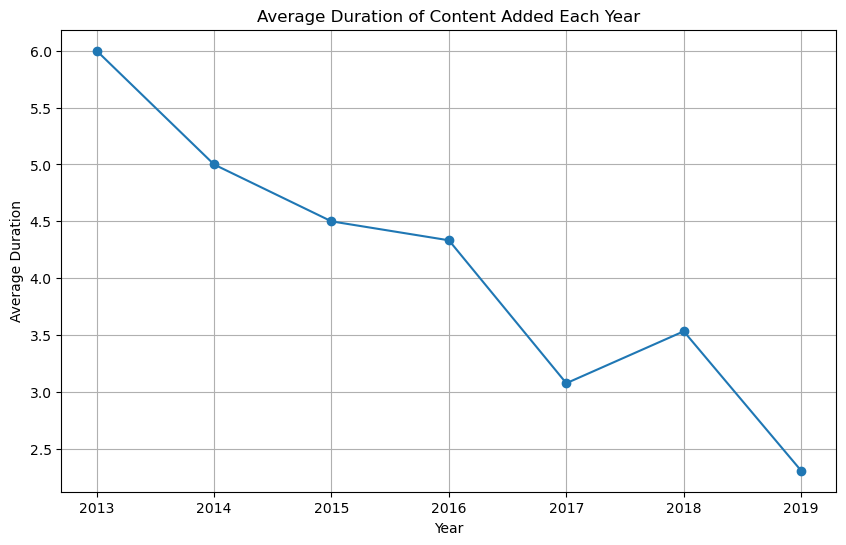

In [103]:

# Convert 'date_added' to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract year from 'date_added'
netflix_df['year_added'] = netflix_df['date_added'].dt.year


# Extract numeric values from 'duration' column
netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)', expand=False)
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'])

# Calculate the average duration for each year
average_duration_yearly = netflix_df.groupby('year_added')['duration'].mean()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(average_duration_yearly.index, average_duration_yearly.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.title('Average Duration of Content Added Each Year')
plt.grid(True)
plt.show()



# statistical analysis

In [113]:
netflix_df.describe()

,date_added,release_year,duration,year_added
count,58,7787.000000,7784.000000,58.000000
mean,2017-10-15 04:08:16.551724032,2014.731604,68.069245,2017.224138
min,2013-10-08 00:00:00,1925.000000,1.000000,2013.000000
25%,2016-10-02 00:00:00,2014.000000,2.000000,2016.000000
50%,2017-12-08 12:00:00,2017.000000,87.000000,2017.000000
75%,2018-12-14 18:00:00,2019.000000,105.000000,2018.000000
max,2019-12-03 00:00:00,2021.000000,312.000000,2019.000000
std,NaN,8.139667,51.310258,1.463511


In [123]:
# Grouping by a categorical variable ('type') and calculating the mean for 'release_year'
average_release_year_by_type = netflix_df.groupby('type')['release_year'].mean()
average_release_year_by_type


type
Movie      2013.721866
TV Show    2016.878362
Name: release_year, dtype: float64

In [124]:
# Grouping by 'rating' and finding the average 'release_year'
average_release_year_by_rating = netflix_df.groupby('rating')['release_year'].mean()
average_release_year_by_rating


rating
66 min      2015.000000
74 min      2017.000000
84 min      2010.000000
G           1997.727273
NC-17       2015.000000
NR          2011.115385
PG          2009.557018
PG-13       2009.873315
R           2011.152139
TV-14       2014.114198
TV-G        2016.182266
TV-MA       2016.847297
TV-PG       2014.275401
TV-Y        2017.220690
TV-Y7       2015.677419
TV-Y7-FV    2014.833333
UR          1974.000000
Name: release_year, dtype: float64

In [125]:
#Grouping by 'country' and calculating the average 'release_year'
average_release_year_by_country = netflix_df.groupby('country')['release_year'].mean()
average_release_year_by_country


country
, France, Algeria                                      2014.000000
, South Korea                                          2021.000000
Argentina                                              2015.892857
Argentina, Brazil, France, Poland, Germany, Denmark    2019.000000
Argentina, Chile                                       2006.000000
                                                          ...     
Venezuela                                              2017.000000
Venezuela, Colombia                                    2007.000000
Vietnam                                                2017.444444
West Germany                                           1977.000000
Zimbabwe                                               2017.000000
Name: release_year, Length: 660, dtype: float64

Conclusion for the statistic analysis  

Content Type and Release Year:
Movies tend to have an average release year around 2013, while TV shows are more recent, averaging around 2017.
Release Year and Content Rating:

Different content ratings show varying average release years. For example, 'G' rated content dates back to the late '90s, while 'TV-Y' shows are from around 2017.
Release Year Across Countries:

Release years vary widely across countries, suggesting a mix of older and newer content. This reflects diverse regional content offerings and Netflix's global content strategy.

These insights highlight Netflix's efforts to provide a varied content library across different timelines, ratings, and regions, catering to diverse audience preferences.

